In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as ctx

In [2]:
perimeters = gpd.read_file('perimeters.shp')
print(perimeters.shape)

(23473, 10)


In [3]:
perimeters.head()

,objectid,year_,acres,fire_name,unit_id,irwinid,fire_num,st_area_sh,st_length_,geometry
0,21999,2001,11059.673693,BACON POND,ID-SID,{00000000-0000-0000-0000-000000000000},2001-ID-SID-G290,0.004912,0.464703,"POLYGON ((-114.28942 42.60647, -114.28961 42.6..."
1,22000,2001,72.801837,S WALCOTT,ID-SID,{00000000-0000-0000-0000-000000000000},2001-ID-SID-G296,0.000032,0.033650,"POLYGON ((-113.42031 42.57474, -113.42039 42.5..."
2,22001,2001,15.452375,ROCK CREEK,ID-SID,{00000000-0000-0000-0000-000000000000},2001-ID-SID-G303,0.000007,0.012800,"POLYGON ((-114.31075 42.38745, -114.31054 42.3..."
3,22002,2001,101.092962,I84MP246,ID-SID,{00000000-0000-0000-0000-000000000000},2001-ID-SID-G308,0.000045,0.051676,"POLYGON ((-113.19283 42.31457, -113.19275 42.3..."
4,22003,2001,191.213671,HWY84MP18,ID-SID,{00000000-0000-0000-0000-000000000000},2001-ID-SID-G312,0.000085,0.037007,"POLYGON ((-113.47269 42.54494, -113.47181 42.5..."


In [6]:
# Latitude and longitude bounding box for San Diego county
from shapely.geometry import Point
MIN_LAT, MAX_LAT = 32.4, 33.6
MIN_LONG, MAX_LONG = -116, -118
sd_perimeters = perimeters.cx[MIN_LONG:MAX_LONG, MIN_LAT:MAX_LAT]
print(sd_perimeters.shape)
sd_perimeters.crs = {'init' :'epsg:4326'}
sd_perimeters = sd_perimeters.to_crs(epsg=3857)
sd_perimeters.head()

(284, 10)


C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,objectid,year_,acres,fire_name,unit_id,irwinid,fire_num,st_area_sh,st_length_,geometry
143,22137,2005,25.473090,SPICE,CA-MVU,{00000000-0000-0000-0000-000000000000},2005-CA-MVU-008761,0.000010,0.017150,"POLYGON ((-12991819.366 3853090.819, -12991797..."
171,22164,2005,100.177302,ROCK,CA-RRU,{00000000-0000-0000-0000-000000000000},2005-CA-RRU-062519,0.000039,0.027371,"POLYGON ((-12975315.964 3953267.876, -12975358..."
175,22168,2016,40.300000,PALA,CASCA,{00000000-0000-0000-0000-000000000000},2016-CASCA-007653,0.000016,0.027255,"MULTIPOLYGON (((-13034713.668 3951078.872, -13..."
262,22255,2000,11.268199,BARRETT DAM,CA-,{00000000-0000-0000-0000-000000000000},2000-CA-00000000,0.000004,0.009328,"POLYGON ((-12987809.503 3850526.986, -12987780..."
308,22302,2002,83.719271,LAGUNA,CA-,{00000000-0000-0000-0000-000000000000},2002-CA-,0.000033,0.023245,"POLYGON ((-13110018.896 3971543.266, -13109810..."


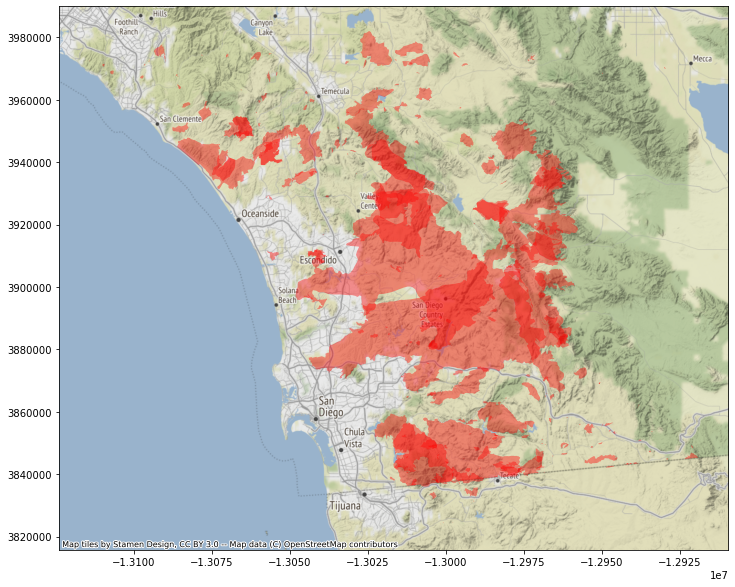

In [10]:
f, ax = plt.subplots(1, figsize=(12, 12))
sd_perimeters.plot(ax=ax, color='red', alpha=.4)
ctx.add_basemap(ax)